In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/t아카데미/파이널/Machine_Signal_30_train.csv')

In [4]:
df['year'] = df['date'].apply(lambda x:str(x)[:4])
df['month'] = df['date'].apply(lambda x:str(x)[4:6])
df['day'] = df['date'].apply(lambda x:str(x)[-2:])
df['time'] = pd.to_datetime(df.date.astype('str') + df.hour.astype('str'), format='%Y%m%d%H')
df['datetime'] = pd.to_datetime(df.date, format='%Y%m%d')
df['dayofweek'] = df['datetime'].dt.weekday

# Z-score

In [5]:
df['datetime'] = pd.to_datetime(df['date'].astype(str) + df['hour'].astype(str), format='%Y%m%d%H') # 데이터시간별로.

In [6]:
tmp=df.resample('H', on='datetime')['lower_prb'].mean()
# 모든 기지국에 lowerprb의 평균치
# 평균적으로 이정도 수치가 나오는게 정상인데 이상치가 나올텐데 어느커틀라인인지 모르기 때문, z-score로 , ! 평균0인데 표준편차를1이라 했을 때 1.96 떨어진 기점으로 전체데이터2.5%

In [7]:
np.mean(tmp), np.std(tmp) # 23, 7

(23.326828420419748, 7.550543078194576)

In [8]:
tmp_normal = (tmp-np.mean(tmp))/np.std(tmp)

<Axes: >

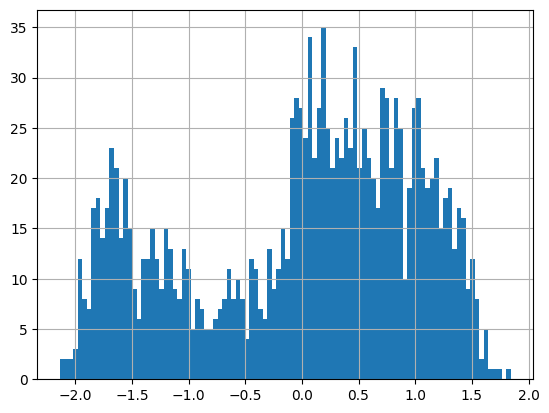

In [9]:
tmp_normal.hist(bins=100)

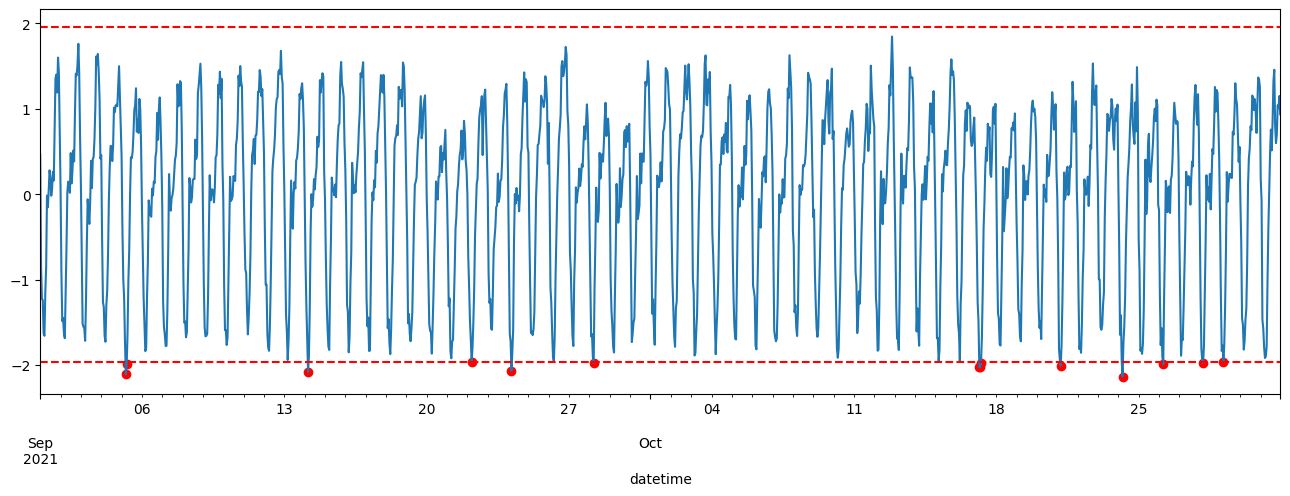

In [10]:
tmp_normal.plot(kind='line', figsize=(16,5))
plt.axhline(1.96, color='red', linestyle='--')
plt.axhline(-1.96, color='red', linestyle='--')

anomalies = tmp_normal[np.abs(tmp_normal) > 1.96]
plt.scatter(anomalies.index, anomalies.values, color='r')
plt.show()

In [11]:
tmp_normal[np.abs(tmp_normal)>1.96]

datetime
2021-09-05 05:00:00   -2.109813
2021-09-05 06:00:00   -1.989998
2021-09-14 04:00:00   -2.081310
2021-09-22 05:00:00   -1.962990
2021-09-24 04:00:00   -2.065801
2021-09-28 05:00:00   -1.974999
2021-10-17 04:00:00   -2.026774
2021-10-17 05:00:00   -2.026315
2021-10-17 06:00:00   -1.975221
2021-10-21 04:00:00   -2.006255
2021-10-24 05:00:00   -2.135045
2021-10-26 05:00:00   -1.991422
2021-10-28 04:00:00   -1.975732
2021-10-29 04:00:00   -1.961509
Name: lower_prb, dtype: float64

In [13]:
# 라이브러리
from scipy import stats
stats.zscore(tmp)

datetime
2021-09-01 00:00:00    0.465438
2021-09-01 01:00:00   -0.858414
2021-09-01 02:00:00   -1.227290
2021-09-01 03:00:00   -1.239193
2021-09-01 04:00:00   -1.629778
                         ...   
2021-10-31 19:00:00    0.699169
2021-10-31 20:00:00    1.039464
2021-10-31 21:00:00    1.005509
2021-10-31 22:00:00    1.148140
2021-10-31 23:00:00    0.934116
Freq: H, Name: lower_prb, Length: 1464, dtype: float64

In [14]:
def find_anomalies(feature):
    # 시간대별로 집계
    tmp = df.resample('H', on='datetime')[feature].mean()
    # zsocre 계산
    tmp_normal = stats.zscore(tmp)
    # subplots 그리기
    fig, axs = plt.subplots(1,2,figsize=(18,5),width_ratios=[2,1])
    axs[0].set_title(f'{feature}\'s anomalies')
    axs[0].plot(tmp_normal)
    axs[0].axhline(y=1.96, color='r', linestyle='--')
    axs[0].axhline(y=-1.96, color='r', linestyle='--')

    # 이상치 표시
    anomalies = tmp_normal[np.abs(tmp_normal) > 1.96]
    axs[0].scatter(anomalies.index, anomalies.values, color='r')

    axs[1].hist(tmp_normal, bins=100)
    axs[1].set_title(f'{feature}\'s histogram')
    plt.show()

In [15]:
feature_list=['connect_avg', 'connect_max', 'in_handover_rate', 'out_handover_rate', 'inter_handover_rate', 'lower_prb', 'upper_prb', 'reconfig_rate']

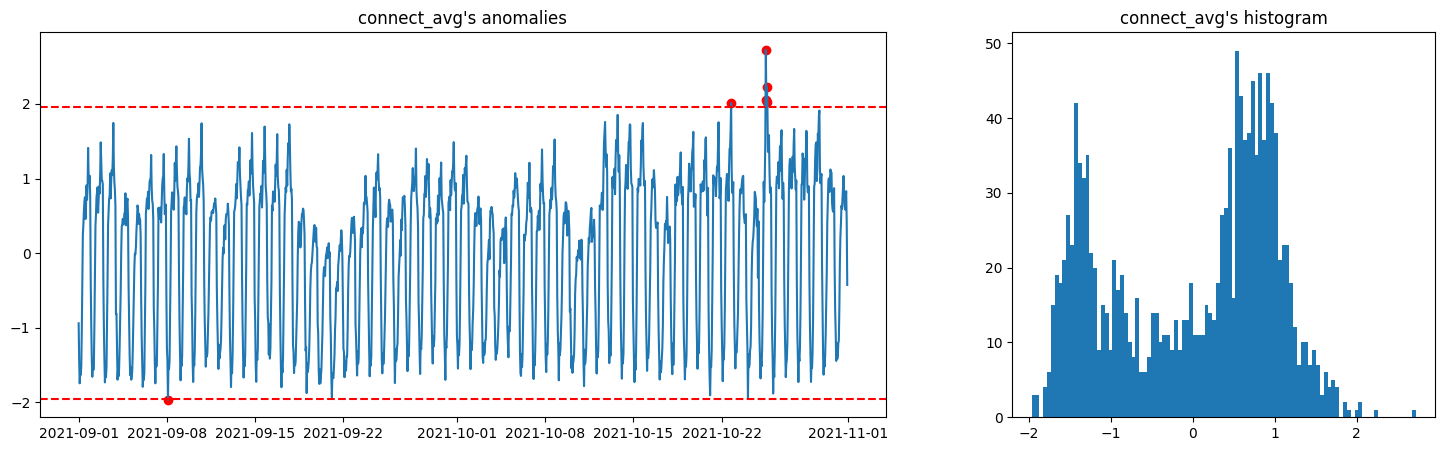

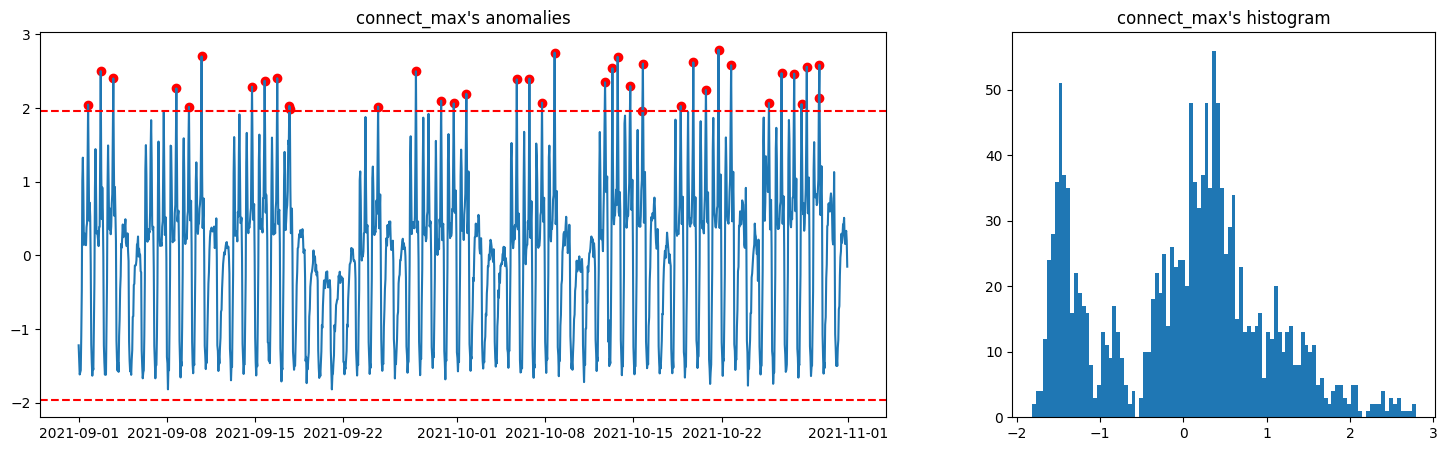

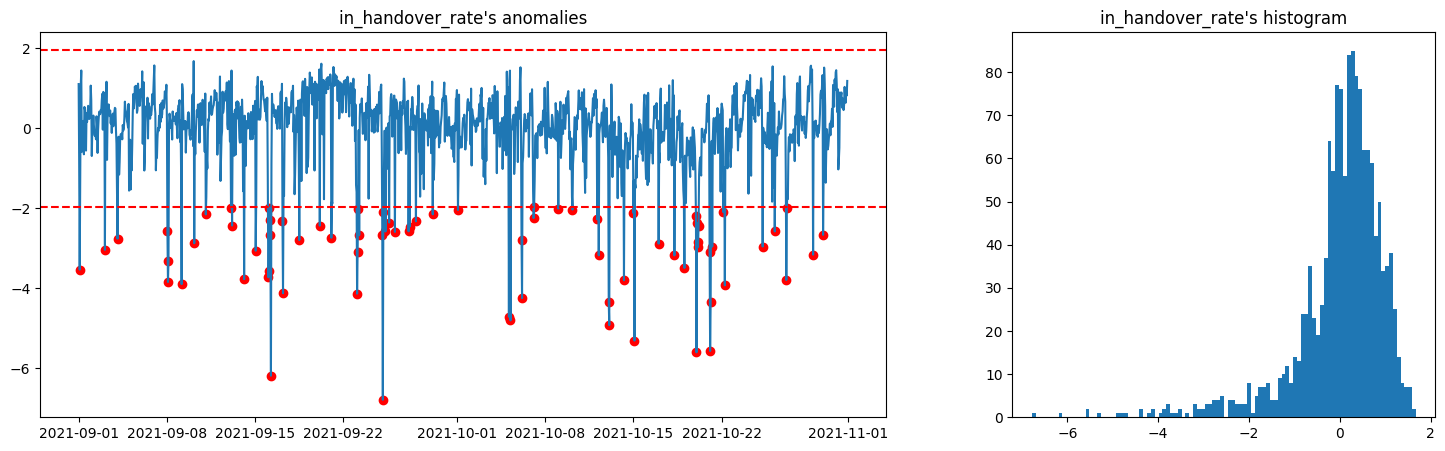

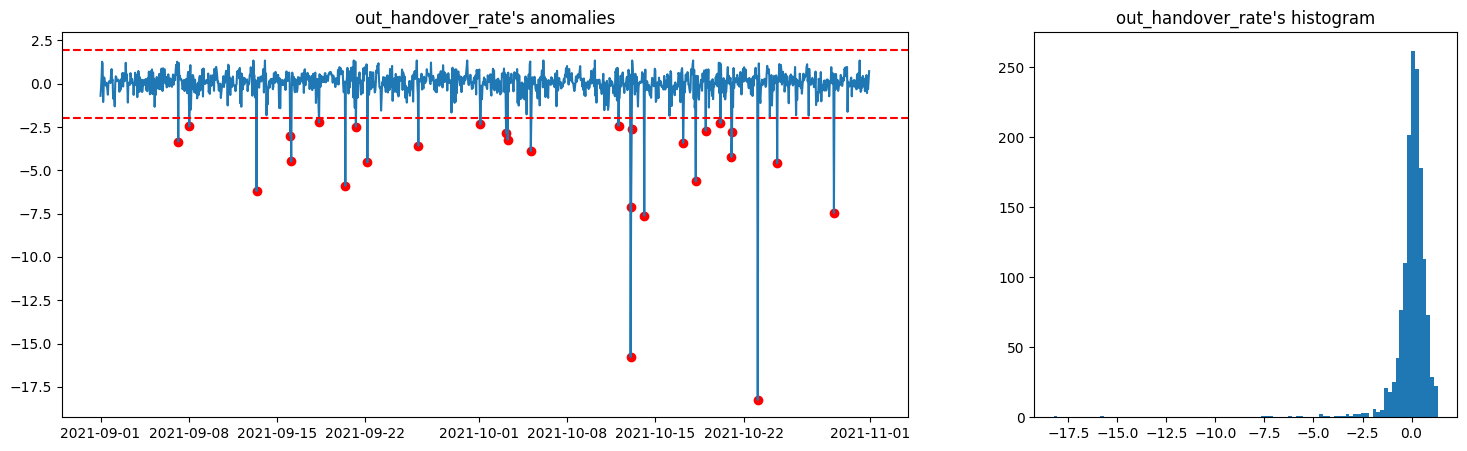

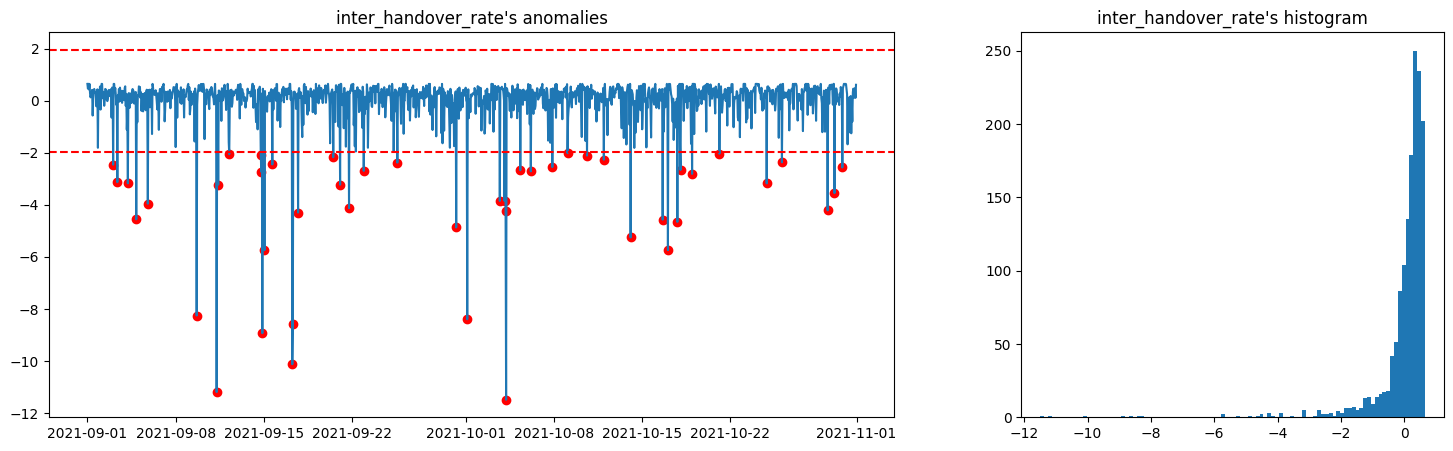

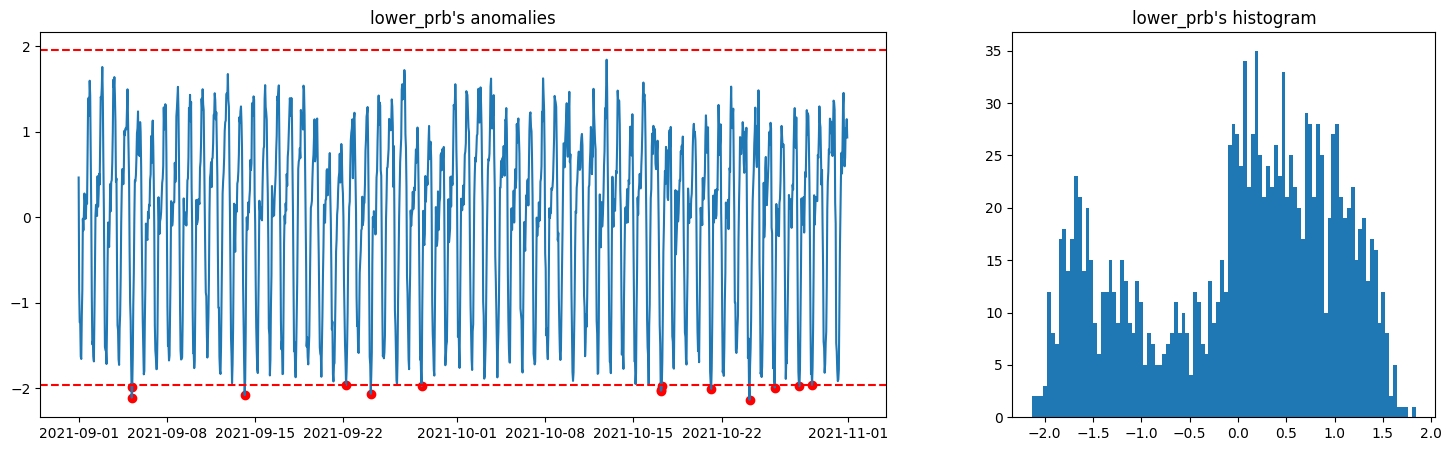

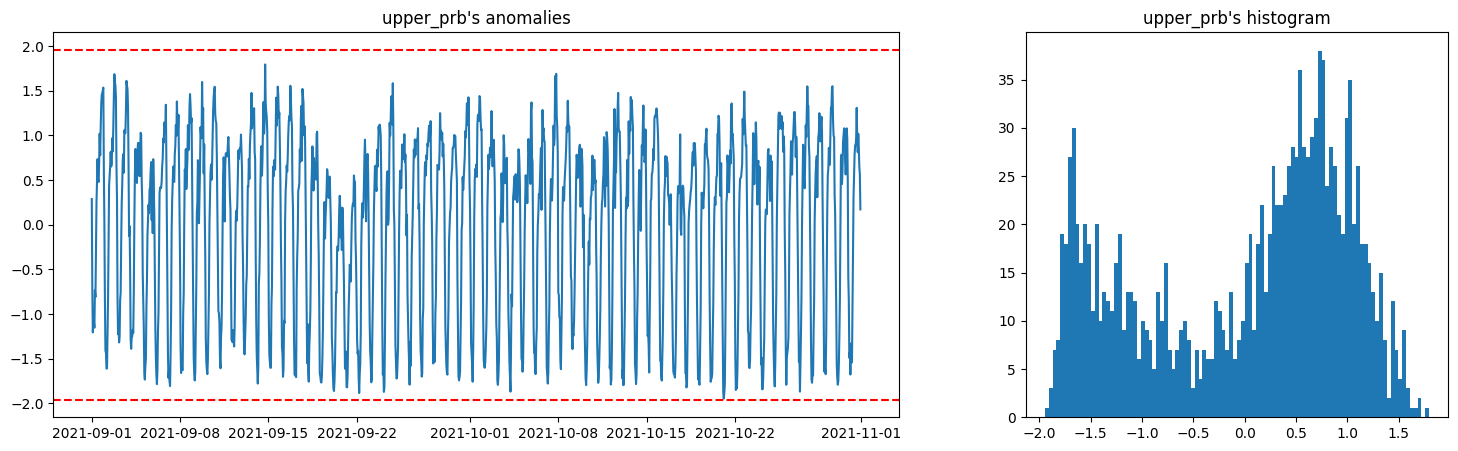

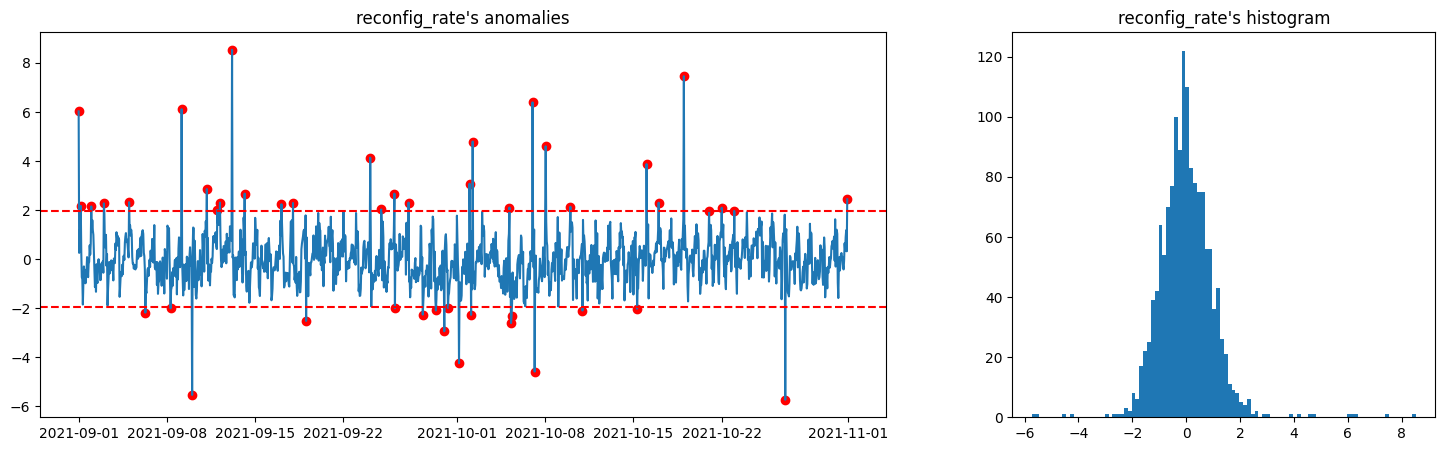

In [16]:
figsize=(16,5)
for feature in feature_list:
    find_anomalies(feature)

In [17]:
df

,ckey,machine_id,date,hour,connect_avg,connect_max,in_handover_rate,out_handover_rate,inter_handover_rate,lower_prb,upper_prb,reconfig_rate,year,month,day,time,datetime,dayofweek
0,MA1004_0-20210901-0,MA1004_0,20210901,0,27.913285,43.0,97.523220,100.000000,100.000000,45.402603,59.021408,100.409763,2021,09,01,2021-09-01 00:00:00,2021-09-01 00:00:00,2
1,MA1004_0-20210901-1,MA1004_0,20210901,1,23.013333,36.0,98.170732,NaN,100.000000,36.740540,21.128778,99.953052,2021,09,01,2021-09-01 01:00:00,2021-09-01 01:00:00,2
2,MA1004_0-20210901-2,MA1004_0,20210901,2,22.158977,38.0,98.039216,98.765432,100.000000,28.568421,15.338933,100.249377,2021,09,01,2021-09-01 02:00:00,2021-09-01 02:00:00,2
3,MA1004_0-20210901-3,MA1004_0,20210901,3,18.396667,34.0,98.717949,100.000000,100.000000,16.503713,8.009815,100.512821,2021,09,01,2021-09-01 03:00:00,2021-09-01 03:00:00,2
4,MA1004_0-20210901-4,MA1004_0,20210901,4,14.173889,28.0,97.014925,100.000000,100.000000,14.133542,5.109716,99.923136,2021,09,01,2021-09-01 04:00:00,2021-09-01 04:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42451,MA1132_12-20211031-19,MA1132_12,20211031,19,11.391667,45.0,99.447514,100.000000,99.700599,14.068990,3.048933,98.417814,2021,10,31,2021-10-31 19:00:00,2021-10-31 19:00:00,6
42452,MA1132_12-20211031-20,MA1132_12,20211031,20,14.432222,49.0,99.335548,100.000000,100.000000,24.932063,7.967112,98.932284,2021,10,31,2021-10-31 20:00:00,2021-10-31 20:00:00,6
42453,MA1132_12-20211031-21,MA1132_12,20211031,21,13.742778,52.0,98.579041,99.818841,100.000000,19.279502,4.558336,98.698670,2021,10,31,2021-10-31 21:00:00,2021-10-31 21:00:00,6
42454,MA1132_12-20211031-22,MA1132_12,20211031,22,15.106111,84.0,99.502488,100.000000,100.000000,24.277397,6.264523,98.130369,2021,10,31,2021-10-31 22:00:00,2021-10-31 22:00:00,6


In [18]:
df['week']=np.where((df['datetime'].dt.dayofweek == 5) | (df['datetime'].dt.dayofweek == 6), '주말','주중')

In [19]:
df.groupby('week')[feature_list].agg(['mean','std'], numeric_only=True).T

week                             주말         주중
connect_avg         mean  17.565218  19.513418
                    std   18.040292  20.001070
connect_max         mean  35.685868  42.791923
                    std   25.985055  36.131876
in_handover_rate    mean  97.403849  97.112275
                    std    7.947914   8.492876
out_handover_rate   mean  99.760897  99.757453
                    std    0.787107   0.759422
inter_handover_rate mean  99.730090  99.732922
                    std    1.952716   2.037545
lower_prb           mean  23.973800  23.157764
                    std   20.942605  19.231827
upper_prb           mean  14.121143  15.247605
                    std   15.184091  15.696488
reconfig_rate       mean  98.962407  98.671634
                    std    5.830605   5.871655

In [20]:
feature_list = ['connect_avg', 'connect_max', 'in_handover_rate', 'out_handover_rate', 'inter_handover_rate', 'lower_prb', 'upper_prb', 'reconfig_rate']

tmp = df.resample('H', on='datetime')[feature_list].mean()
tmp['week'] = np.where((tmp.index.dayofweek == 5)|(tmp.index.dayofweek == 6), 'weekend', 'weekday')
tmp['hour'] = np.where((9<= tmp.index.hour)&(tmp.index.hour<= 20), 'day', 'night')

<Axes: xlabel='upper_prb', ylabel='Count'>

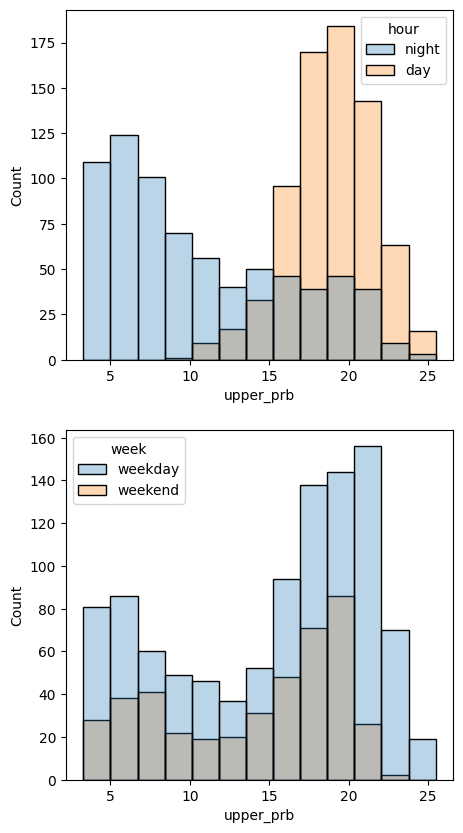

In [21]:
import seaborn as sns
plt.figure(figsize=(5,10))
plt.subplot(211)
sns.histplot(data=tmp, x='upper_prb',hue='hour', alpha=0.3)
plt.subplot(212)
sns.histplot(data=tmp, x='upper_prb',hue='week', alpha=0.3)

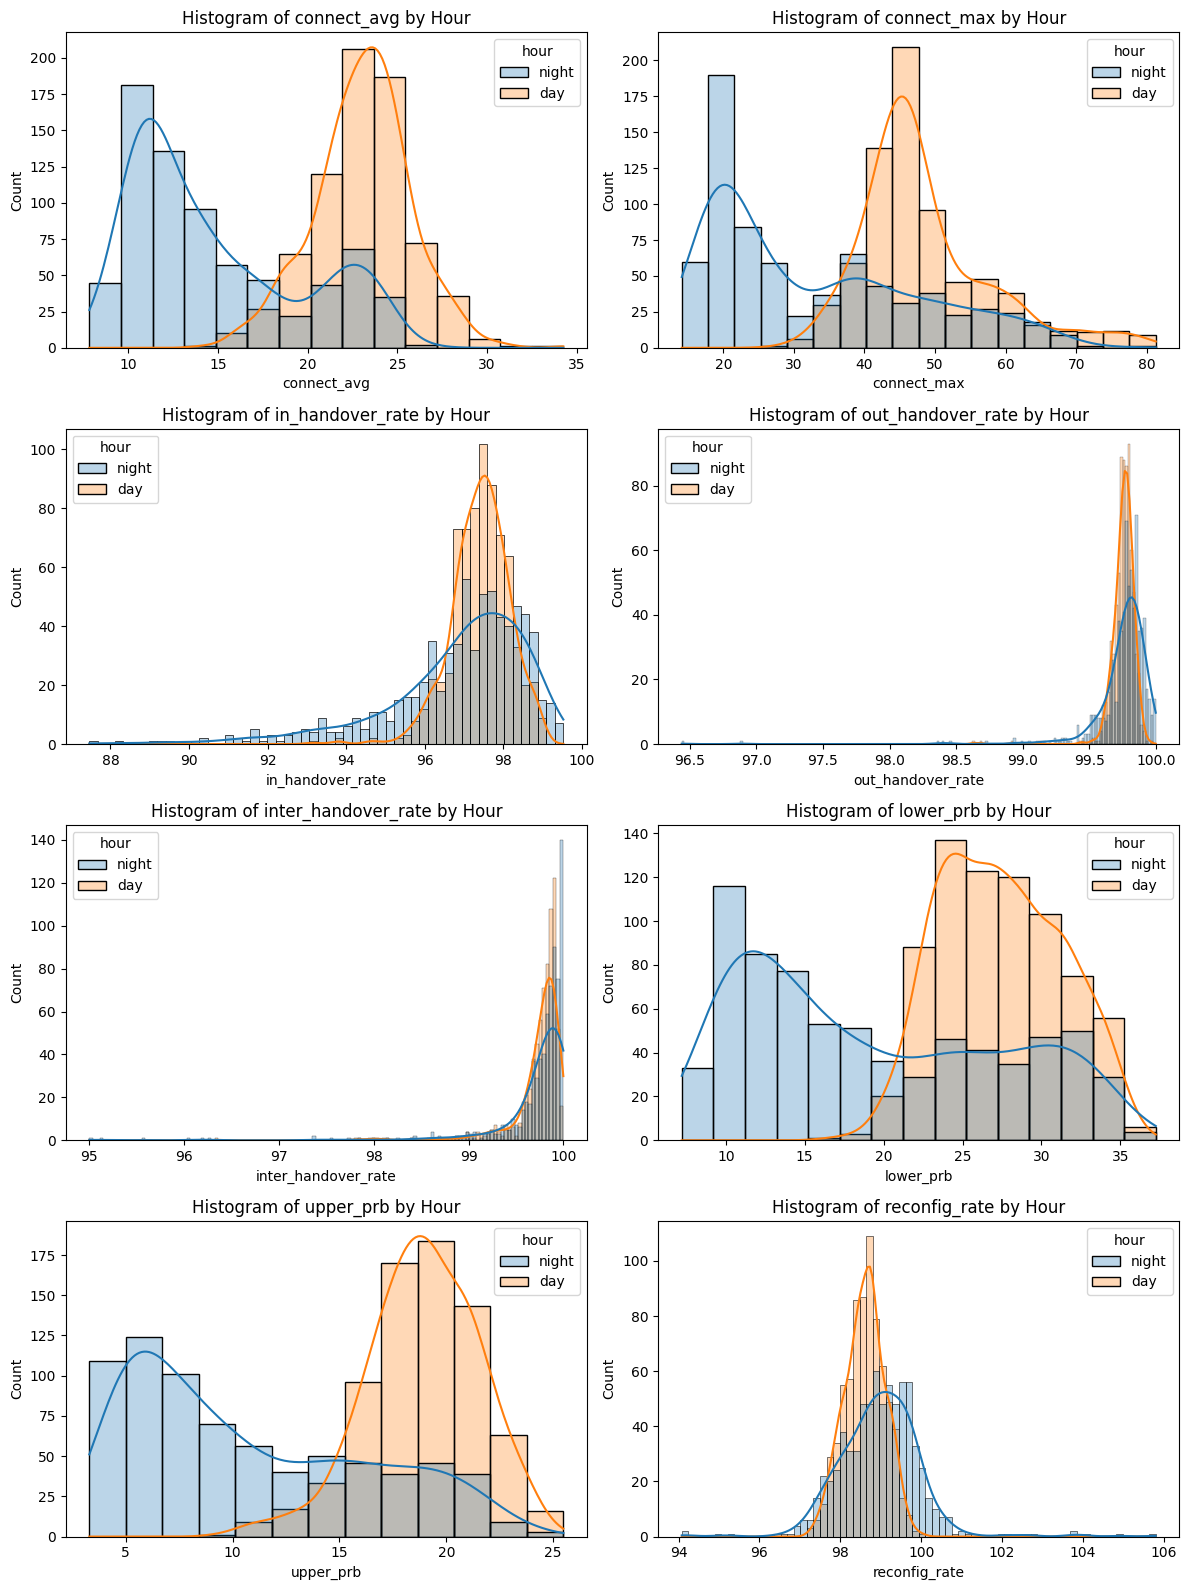

In [22]:
# Feature 리스트
plt.figure(figsize=(12, 16))

# 각 컬럼에 대한 히스토그램 그리기
for i, feature in enumerate(feature_list):
    plt.subplot(len(feature_list)//2, 2, i+1)
    sns.histplot(data=tmp, x=feature, hue='hour', alpha=0.3, kde=True)
    plt.title(f'Histogram of {feature} by Hour')

plt.tight_layout()
plt.show()

# Box-plot

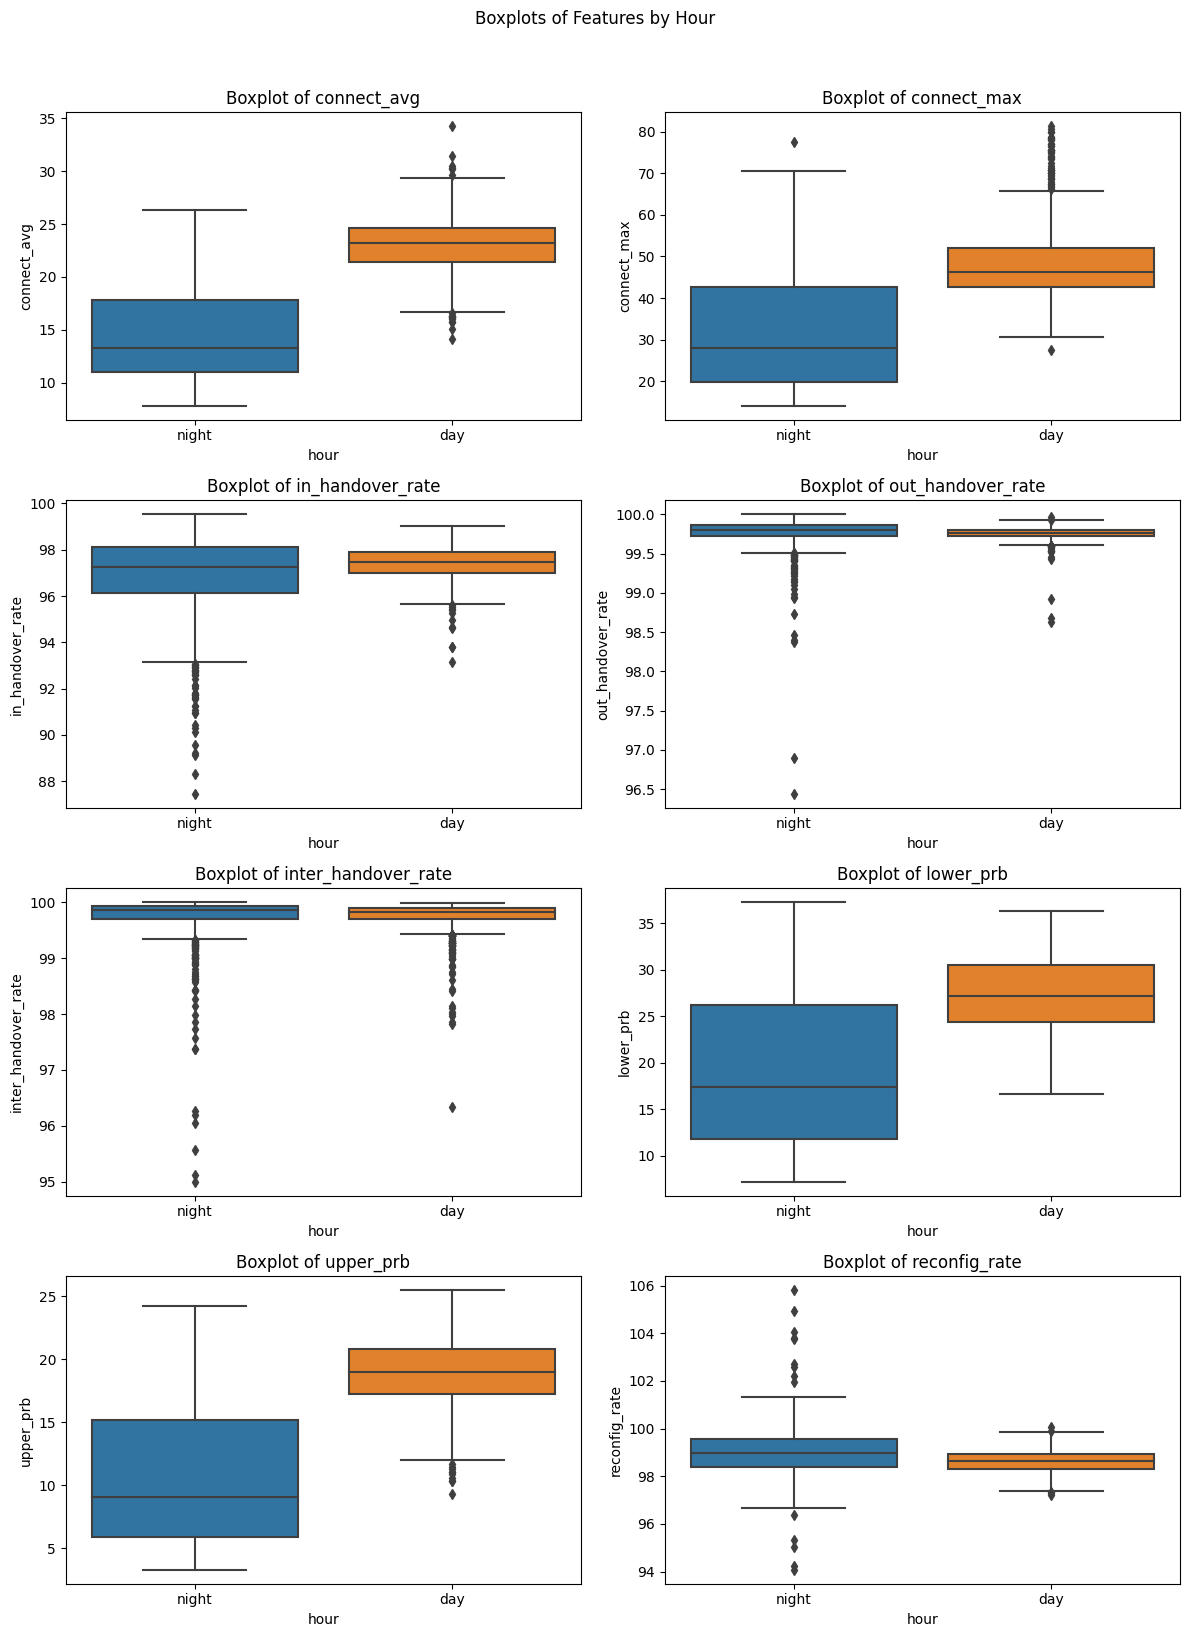

In [24]:
# 시각화를 위한 서브플롯 생성
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig.suptitle('Boxplots of Features by Hour', y=1.02)

# 각 컬럼에 대한 'hour'별 boxplot 그리기
for i, feature in enumerate(feature_list):
    row = i // 2
    col = i % 2
    sns.boxplot(x='hour', y=feature, data=tmp, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# Matrix Profile

In [25]:
!pip install -q stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 2.5 MB/s eta 0:00:00


In [26]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [30]:
tmp1 = tmp

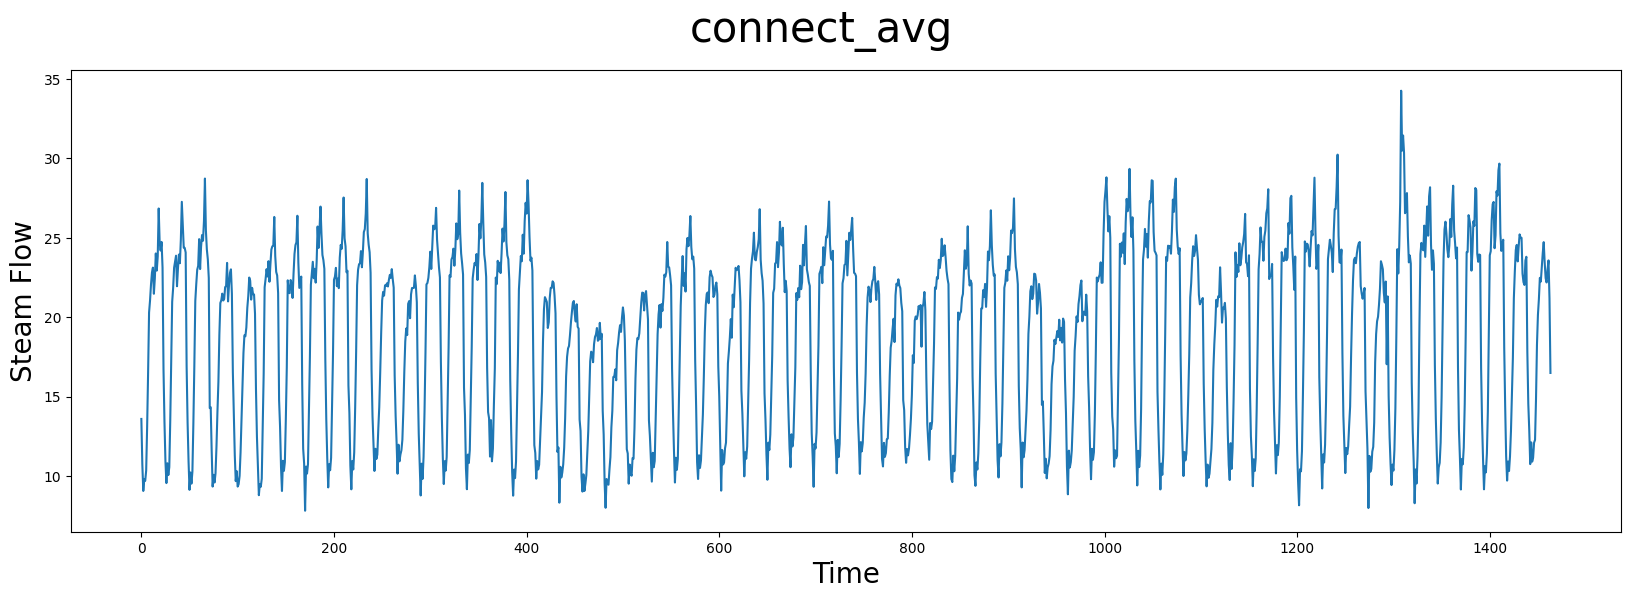

In [31]:
plt.suptitle('connect_avg', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(tmp1['connect_avg'].values)
plt.show()

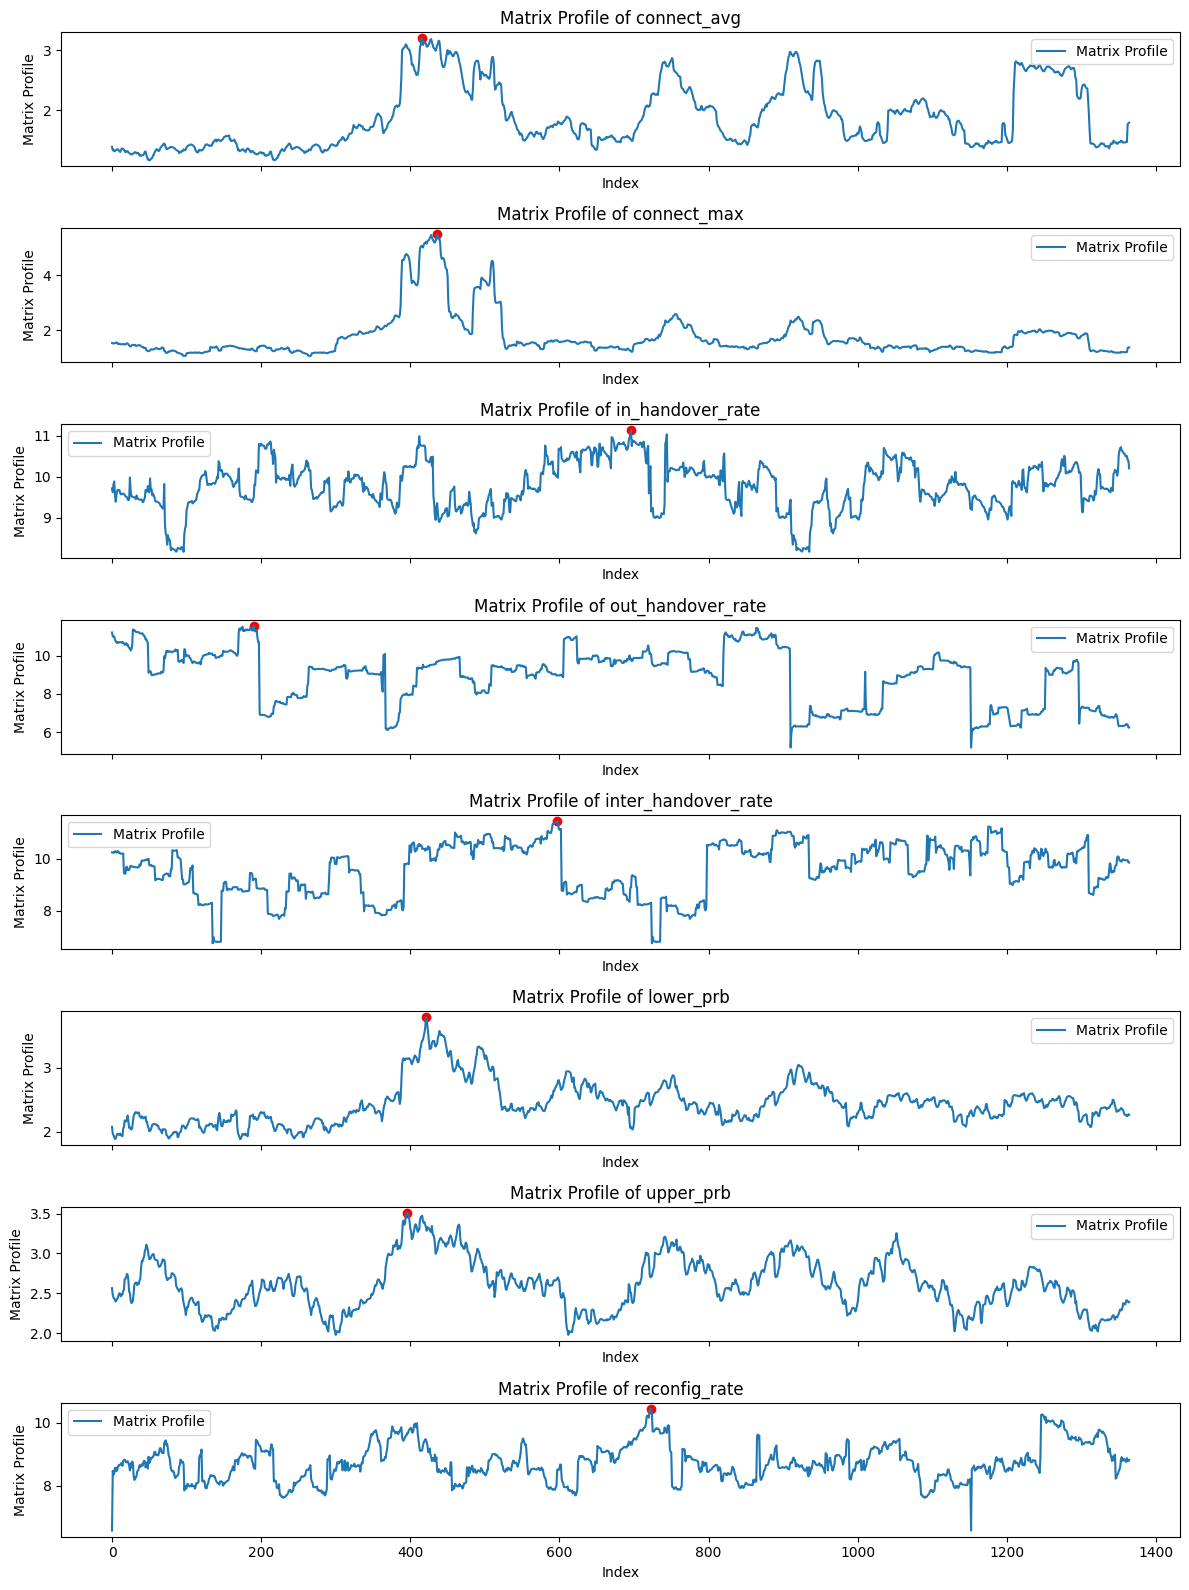

In [32]:
import stumpy
import matplotlib.pyplot as plt

# Feature 리스트
feature_list = ['connect_avg', 'connect_max', 'in_handover_rate', 'out_handover_rate', 'inter_handover_rate', 'lower_prb', 'upper_prb', 'reconfig_rate']

# windowsize 설정
windowsize = 100

# Matrix Profile 시각화 함수
def plot_matrix_profile(matrix_profile, ax, feature):
    ax.plot(matrix_profile, label='Matrix Profile')
    ax.set_title(f'Matrix Profile of {feature}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Matrix Profile')
    ax.legend()

# 'hour'별로 Matrix Profile 계산 및 이상치 시각화
fig, axes = plt.subplots(len(feature_list), 1, figsize=(12, 16), sharex=True)

for i, feature in enumerate(feature_list):
    ax = axes[i]

    # 'hour'별로 Matrix Profile 계산
    matrix_profile = stumpy.stump(tmp[feature].values, m=windowsize)

    # 이상치 인덱스 찾기 (임계값 설정 필요)
    threshold = 2.0  # 임의의 임계값 설정
    matrix_profile_idx = stumpy.stump(tmp[feature].values, m=windowsize, ignore_trivial=True)

    # Matrix Profile 및 이상치 시각화
    plot_matrix_profile(matrix_profile[:, 0], ax, feature)
    max_idx = np.argmax(matrix_profile_idx[:,0])

    ax.scatter(max_idx, matrix_profile_idx[[max_idx],0], marker='o', color='r', label='Anomalies')

plt.tight_layout()
plt.show()